## 고객별연간지출액예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("./data/ecommerce.csv")
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [4]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Axes: >

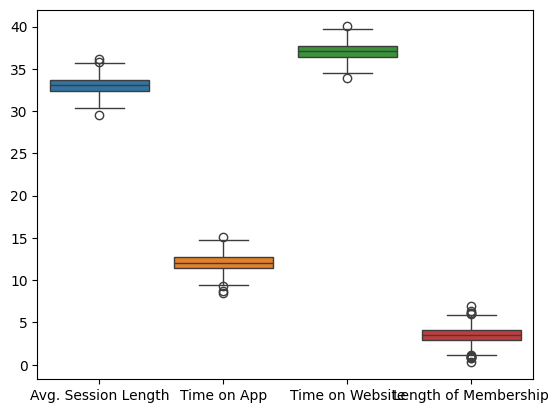

In [5]:
sns.boxplot(data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']])

In [6]:
data.describe(include='all')

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500,500,500,500.000000,500.000000,500.000000,500.000000,500.000000
unique,500,500,138,NaN,NaN,NaN,NaN,NaN
top,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",SlateBlue,NaN,NaN,NaN,NaN,NaN
freq,1,1,7,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,33.053194,12.052488,37.060445,3.533462,499.314038
std,NaN,NaN,NaN,0.992563,0.994216,1.010489,0.999278,79.314782
min,NaN,NaN,NaN,29.532429,8.508152,33.913847,0.269901,256.670582
25%,NaN,NaN,NaN,32.341822,11.388153,36.349257,2.930450,445.038277
50%,NaN,NaN,NaN,33.082008,11.983231,37.069367,3.533975,498.887875
75%,NaN,NaN,NaN,33.711985,12.753850,37.716432,4.126502,549.313828


* Email : 고객의 이메일 주소
* Address : 고객이 사는 주소
* Avatar : 고객의 아바타 캐릭터
* Avb.Session Length : 고객의 접속한 시간의 평균
* Time on App : 어플리케이션에서 사용한 시간
* Time on Website : 웹 사이트에서 사용한 시간
* Length of Membership : 고객의 맴버쉽 가입 기간
* Yearly Amount Spent : 고객이 연간 쓴 금액
 
데이터의 컬럼을 살펴본 결과 우리는 Yearly Amount Spent를 예측해야 한다는 것을 알 수 있다.

In [7]:
data['Email'].head(20)


0         mstephenson@fernandez.com
1                 hduke@hotmail.com
2                  pallen@yahoo.com
3           riverarebecca@gmail.com
4     mstephens@davidson-herman.com
5            alvareznancy@lucas.biz
6             katherine20@yahoo.com
7                awatkins@yahoo.com
8       vchurch@walter-martinez.com
9                  bonnie69@lin.biz
10            andrew06@peterson.com
11           ryanwerner@freeman.biz
12                knelson@gmail.com
13            wrightpeter@yahoo.com
14            taylormason@gmail.com
15              jstark@anderson.com
16              wjennings@gmail.com
17         rebecca45@hale-bauer.biz
18          alejandro75@hotmail.com
19           samuel46@love-west.net
Name: Email, dtype: object

In [10]:
data['Avatar'].head(20)

0               Violet
1            DarkGreen
2               Bisque
3          SaddleBrown
4     MediumAquaMarine
5          FloralWhite
6        DarkSlateBlue
7                 Aqua
8               Salmon
9                Brown
10              Tomato
11              Tomato
12           RoyalBlue
13              Bisque
14            DarkBlue
15                Peru
16          PowderBlue
17           OliveDrab
18                Cyan
19       LightSeaGreen
Name: Avatar, dtype: object

In [8]:
data['Address'].head(20)

0          835 Frank Tunnel\nWrightmouth, MI 82180-9605
1        4547 Archer Common\nDiazchester, CA 06566-8576
2     24645 Valerie Unions Suite 582\nCobbborough, D...
3      1414 David Throughway\nPort Jason, OH 22070-1220
4     14023 Rodriguez Passage\nPort Jacobville, PR 3...
5     645 Martha Park Apt. 611\nJeffreychester, MN 6...
6     68388 Reyes Lights Suite 692\nJosephbury, WV 9...
7                 Unit 6538 Box 8980\nDPO AP 09026-4941
8                860 Lee Key\nWest Debra, SD 97450-0495
9                 PSC 2734, Box 5255\nAPO AA 98456-7482
10    26104 Alexander Groves\nAlexandriaport, WY 282...
11                Unit 2413 Box 0347\nDPO AA 07580-2652
12    6705 Miller Orchard Suite 186\nLake Shanestad,...
13     05302 Dunlap Ferry\nNew Stephaniehaven, MP 42268
14    7773 Powell Springs Suite 190\nSamanthaland, N...
15    49558 Ramirez Road Suite 399\nPhillipstad, OH ...
16          6362 Wilson Mountain\nJohnsonfurt, GA 15169
17                 8982 Burton Row\nWilsonton, P

In [9]:
data['Address'].str.split(",")

0        [835 Frank Tunnel\nWrightmouth,  MI 82180-9605]
1      [4547 Archer Common\nDiazchester,  CA 06566-8576]
2      [24645 Valerie Unions Suite 582\nCobbborough, ...
3      [1414 David Throughway\nPort Jason,  OH 22070-...
4      [14023 Rodriguez Passage\nPort Jacobville,  PR...
                             ...                        
495    [4483 Jones Motorway Suite 872\nLake Jamiefurt...
496    [172 Owen Divide Suite 497\nWest Richard,  CA ...
497    [0787 Andrews Ranch Apt. 633\nSouth Chadburgh,...
498    [680 Jennifer Lodge Apt. 808\nBrendachester,  ...
499    [49791 Rachel Heights Apt. 898\nEast Drewborou...
Name: Address, Length: 500, dtype: object

In [12]:
for i in data['Address'].str.split(","):
    print(i)

['835 Frank Tunnel\nWrightmouth', ' MI 82180-9605']
['4547 Archer Common\nDiazchester', ' CA 06566-8576']
['24645 Valerie Unions Suite 582\nCobbborough', ' DC 99414-7564']
['1414 David Throughway\nPort Jason', ' OH 22070-1220']
['14023 Rodriguez Passage\nPort Jacobville', ' PR 37242-1057']
['645 Martha Park Apt. 611\nJeffreychester', ' MN 67218-7250']
['68388 Reyes Lights Suite 692\nJosephbury', ' WV 92213-0247']
['Unit 6538 Box 8980\nDPO AP 09026-4941']
['860 Lee Key\nWest Debra', ' SD 97450-0495']
['PSC 2734', ' Box 5255\nAPO AA 98456-7482']
['26104 Alexander Groves\nAlexandriaport', ' WY 28244-9149']
['Unit 2413 Box 0347\nDPO AA 07580-2652']
['6705 Miller Orchard Suite 186\nLake Shanestad', ' MO 75696-5051']
['05302 Dunlap Ferry\nNew Stephaniehaven', ' MP 42268']
['7773 Powell Springs Suite 190\nSamanthaland', ' ND 44358']
['49558 Ramirez Road Suite 399\nPhillipstad', ' OH 35641-3238']
['6362 Wilson Mountain\nJohnsonfurt', ' GA 15169']
['8982 Burton Row\nWilsonton', ' PW 88606']
['6

In [10]:
for i in data['Address'].str.split(","):
    print(i[-1])

 MI 82180-9605
 CA 06566-8576
 DC 99414-7564
 OH 22070-1220
 PR 37242-1057
 MN 67218-7250
 WV 92213-0247
Unit 6538 Box 8980
DPO AP 09026-4941
 SD 97450-0495
 Box 5255
APO AA 98456-7482
 WY 28244-9149
Unit 2413 Box 0347
DPO AA 07580-2652
 MO 75696-5051
 MP 42268
 ND 44358
 OH 35641-3238
 GA 15169
 PW 88606
 PW 63227
 MT 57912
 KY 50756
 Box 2120
APO AE 15445-2876
 Box 8159
APO AA 74738
USNS Cardenas
FPO AA 85439-9449
 WV 60804-4440
 ND 17957-5596
 VI 75658-5788
 TX 50501-7264
 MS 03651
 SC 56814
 WA 45449-6768
 DC 34587
USCGC Gill
FPO AA 26496
 NJ 19075
 MS 77223
 NH 14470
 PW 22048
 MI 70835-2286
 ME 96590-8272
 ID 03393-5336
 TN 45336-9436
 AK 88122-1314
 KY 99737
 DE 36417-5667
USNV Fuller
FPO AE 32122-5711
 FM 84050
 HI 39319-2739
 KS 52039-7404
 NC 43746-4501
 TN 36880
 UT 97073
 MS 51544
 CA 33824-1610
 AL 22283
 Box 7961
APO AA 55271-2375
 LA 52305-9696
 NE 65650-8529
 OR 34630-1840
 SD 91517-8611
USNV Reese
FPO AA 73568-0730
 MN 96206-5317
 CT 14968-6590
 WA 87027
 MA 17817-8000

In [11]:
for i in data['Address'].str.split(","):
    print(i[-1].split()[-2])

MI
CA
DC
OH
PR
MN
WV
AP
SD
AA
WY
AA
MO
MP
ND
OH
GA
PW
PW
MT
KY
AE
AA
AA
WV
ND
VI
TX
MS
SC
WA
DC
AA
NJ
MS
NH
PW
MI
ME
ID
TN
AK
KY
DE
AE
FM
HI
KS
NC
TN
UT
MS
CA
AL
AA
LA
NE
OR
SD
AA
MN
CT
WA
MA
DE
IN
MS
AZ
AE
MH
NC
AP
HI
NY
MH
CO
CO
AE
IN
IA
GU
IN
IA
AP
NC
WV
TX
AK
VI
AL
AS
AE
RI
SD
VA
NC
DE
AE
AP
MD
FM
WV
OK
WI
VT
FL
IL
MH
MO
MP
NV
TX
PA
NC
AL
MS
ME
MP
ND
AA
VA
DC
OH
KY
IL
KY
SC
AS
AE
AS
WI
OH
NJ
CO
OR
AP
MT
NM
DE
VT
SC
SC
IN
OR
DC
HI
MA
PA
MI
CO
NM
DE
MH
SC
UT
WY
MP
AP
VI
NJ
AE
VI
PA
AA
AP
MH
ND
PA
MT
MO
SD
KY
WI
NV
PR
PA
OR
DE
TX
AK
AR
OR
FL
ME
NC
VT
CA
PR
FL
RI
NJ
IN
RI
NC
SD
SC
NH
VT
PR
WY
FM
WA
WI
WV
AK
NY
AE
AL
PW
MI
LA
FM
SD
AR
NH
VT
IL
HI
KS
ND
DC
RI
IL
MN
VA
AE
GA
PW
OK
NJ
MD
SC
OR
NM
AL
HI
MI
DE
AE
NE
PW
GU
AZ
FM
AR
ID
MI
VA
WY
AA
IA
LA
VT
NV
WV
AA
VA
OR
KS
NY
RI
KS
WV
FL
NY
AR
MT
RI
WY
KY
FM
AZ
LA
NM
NH
VT
AS
MN
MO
RI
MD
IN
PA
TX
MT
OR
OK
NV
AP
AP
AZ
MS
SC
TX
ND
CO
SC
AL
MS
NE
OK
AE
AP
PR
FL
IN
GU
MN
MA
IA
AE
GA
OK
WI
IL
MS
AL
WY
PR
MN
LA
NV
PA
AL
GA
HI
SC
DC
NC
NY
VT
WY
MD
N

In [13]:
data['Address'].str.split(",").apply(lambda x: x[-1].split()[-2])

0      MI
1      CA
2      DC
3      OH
4      PR
       ..
495    UT
496    CA
497    TN
498    TX
499    OR
Name: Address, Length: 500, dtype: object

In [14]:
data['state_name'] = data['Address'].str.split(",").apply(lambda x: x[-1].split()[-2])

In [15]:
data

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,state_name
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,PR
...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,UT
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,CA
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,TN
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,TX


In [17]:
data.corr(numeric_only=True)

# 숫자로 되어있는 것들만 보여줌

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<Axes: >

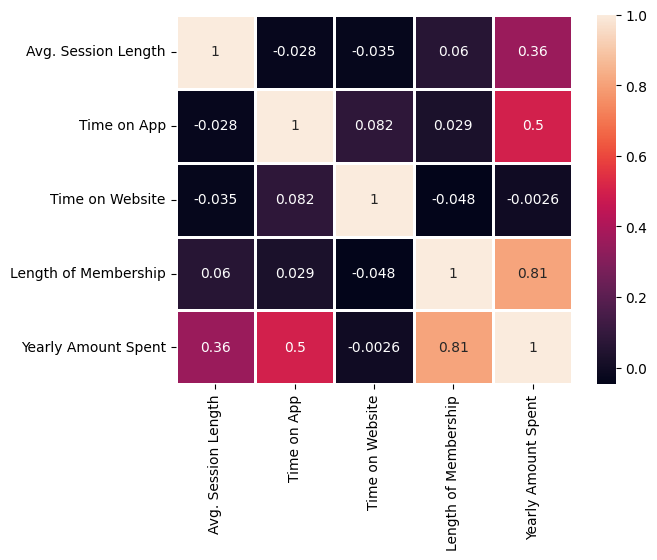

In [18]:
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidth=1)

Email, Address, Avatar 칼럼은 별로 불필요해보이기 때문에 삭제한다. 

In [20]:
data = data.drop(['Email', 'Address','Avatar'], axis=1)
data

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,state_name
0,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,PR
...,...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438,UT
496,34.702529,11.695736,37.190268,3.576526,529.049004,CA
497,32.646777,11.499409,38.332576,4.958264,551.620145,TN
498,33.322501,12.391423,36.840086,2.336485,456.469510,TX


In [22]:
data.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,state_name
0,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,PR


컬럼 이름안에 공백이 있으면 에러가 뜰 수 있다. 

In [23]:
data.columns = [col.replace(" ", "").replace(".", "") for col in data.columns]
data.head()

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,YearlyAmountSpent,state_name
0,34.497268,12.655651,39.577668,4.082621,587.951054,MI
1,31.926272,11.109461,37.268959,2.664034,392.204933,CA
2,33.000915,11.330278,37.110597,4.104543,487.547505,DC
3,34.305557,13.717514,36.721283,3.120179,581.852344,OH
4,33.330673,12.795189,37.536653,4.446308,599.406092,PR


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = data.drop('YearlyAmountSpent', axis = 1)
y = data['YearlyAmountSpent']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

## 다중선형회귀분석하기 

### statsmodels R 문법

In [28]:
# statsmodels R 문법

from statsmodels.formula.api import ols 

In [29]:
train_data = pd.concat([X_train,y_train], axis = 1)
train_data.head()

,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name,YearlyAmountSpent
342,32.342796,11.409645,35.777782,3.872432,MT,486.083426
359,32.054262,13.149670,37.650400,4.195614,ME,561.874658
109,33.356874,13.452129,38.503009,3.318822,MP,549.008227
50,33.256335,13.858062,37.780265,5.976768,UT,725.584814
452,33.552108,11.120871,36.808376,4.027814,ME,521.195311


In [30]:
train_data.columns

Index(['AvgSessionLength', 'TimeonApp', 'TimeonWebsite', 'LengthofMembership',
       'state_name', 'YearlyAmountSpent'],
      dtype='object')

In [31]:
lm = ols('YearlyAmountSpent ~ AvgSessionLength + TimeonApp + TimeonWebsite + LengthofMembership + state_name', data = train_data).fit()

In [32]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     389.1
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          4.36e-279
Time:                        15:08:13   Log-Likelihood:                -1449.5
No. Observations:                 400   AIC:                             3031.
Df Residuals:                     334   BIC:                             3294.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1044.0261     27.310    -38.228      0.000   -1097.748    -990.304
state_name[T.AE]      -0.2681      3.692     -0.073      0.942      -7.531       6.995
state_name[T.AK]       0.6355      5.219      0.122      0.903      -9.631      10.902
state_name[T.AL]      -1.4055      4.423     -0.318      0.751     -10.106       7.295
state_name[T.AP]      -2.0814      4.127     -0.504      0.614     -10.200       6.037
state_name[T.AR]      11.2649      5.701      1.976      0.049       0.050      22.480
state_name[T.AS]      -2.9825      4.620     -0.646      0.519     -12.070       6.105
state_name[T.AZ]      -3.4977      4.606     -0.759      0.448     -12.558       5.563
state_name[T.CA]       3.2973      5.208      0.633      0.527      -6.948      13.543
state_name[T.CO]       4.3226      5.638      0.767      0.444      -6.768      15.413
state_name[T.CT]      -1.8944      5.675     -0.334      0.739     -13.058       9.269
state_name[T.DC]      -7.1931      5.631     -1.277      0.202     -18.270       3.883
state_name[T.DE]      -2.2724      4.125     -0.551      0.582     -10.388       5.843
state_name[T.FL]      -1.0106      4.409     -0.229      0.819      -9.683       7.662
state_name[T.FM]       1.5194      4.858      0.313      0.755      -8.037      11.076
state_name[T.GA]       6.3291      4.620      1.370      0.172      -2.759      15.417
state_name[T.GU]      -1.2212      5.663     -0.216      0.829     -12.361       9.919
state_name[T.HI]      -3.0376      4.846     -0.627      0.531     -12.571       6.496
state_name[T.IA]       5.8753      4.876      1.205      0.229      -3.717      15.467
state_name[T.ID]      -7.0579     10.301     -0.685      0.494     -27.322      13.206
state_name[T.IL]       2.5970      4.850      0.535      0.593      -6.943      12.137
state_name[T.IN]       1.6246      4.883      0.333      0.740      -7.980      11.229
state_name[T.KS]       3.4717      4.408      0.788      0.432      -5.200      12.143
state_name[T.KY]      -1.9248      4.405     -0.437      0.662     -10.590       6.741
state_name[T.LA]       0.3371      4.863      0.069      0.945      -9.229       9.903
state_name[T.MA]       0.3770      5.188      0.073      0.942      -9.829      10.583
state_name[T.MD]       7.5277      5.182      1.453      0.147      -2.666      17.721
state_name[T.ME]       3.6069      4.625      0.780      0.436      -5.490      12.704
state_name[T.MH]      -0.7961      4.876     -0.163      0.870     -10.387       8.795
state_name[T.MI]       9.6009      4.401      2.181      0.030       0.943      18.258
state_name[T.MN]       0.8870      4.911      0.181      0.857      -8.773      10.547
state_name[T.MO]       5.8362      4.023      1.451      0.148      -2.077      13.750
state_name[T.MP]       6.4842      5.6

결론
* Prob (F-statistic):	4.36e-279 : 통계적으로 유의미함
* Adj. R-squared:	0.984 
* P>| t | 에서 0.05 보다 작은 얘들을 봐야함! 

회귀식

y = (11.2649 * AR) + (9.6009 * MI) + (12.1776 * MT) + (25.4119 * AvgSessionLength) + (0.5356 * TimeonApp) + (61.7833 * LengthofMembership) 

### statsmodels Python 문법

In [33]:
# statsmodels Python 문법
import statsmodels.api as sm

In [35]:
# 상수항 추가 
X_train = sm.add_constant(X_train) 
X_test = sm.add_constant(X_test)

In [36]:
X_train.head(2)

,const,AvgSessionLength,TimeonApp,TimeonWebsite,LengthofMembership,state_name
342,1.0,32.342796,11.409645,35.777782,3.872432,MT
359,1.0,32.054262,13.149670,37.650400,4.195614,ME


In [38]:
# get_dummies 해주기

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [40]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [43]:
lr = sm.OLS(y_train, X_train).fit()

# X 랑 y 를 반대로 넣어줘야 함!

In [44]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      YearlyAmountSpent   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     389.1
Date:                Thu, 29 Aug 2024   Prob (F-statistic):          4.36e-279
Time:                        15:35:41   Log-Likelihood:                -1449.5
No. Observations:                 400   AIC:                             3031.
Df Residuals:                     334   BIC:                             3294.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1026.3913     26.613    -38.567      0.000   -1078.741    -974.041
AvgSessionLength      25.4119      0.541     46.946      0.000      24.347      26.477
TimeonApp             38.5121      0.541     71.238      0.000      37.449      39.576
TimeonWebsite          0.5356      0.531      1.009      0.314      -0.508       1.579
LengthofMembership    61.7833      0.542    114.036      0.000      60.718      62.849
state_name_AA        -17.6348      2.730     -6.460      0.000     -23.005     -12.265
state_name_AE        -17.9029      2.626     -6.818      0.000     -23.068     -12.738
state_name_AK        -16.9992      4.465     -3.807      0.000     -25.783      -8.216
state_name_AL        -19.0403      3.540     -5.379      0.000     -26.003     -12.077
state_name_AP        -19.7162      3.175     -6.210      0.000     -25.961     -13.471
state_name_AR         -6.3699      4.983     -1.278      0.202     -16.173       3.433
state_name_AS        -20.6173      3.787     -5.444      0.000     -28.068     -13.167
state_name_AZ        -21.1325      3.766     -5.612      0.000     -28.540     -13.725
state_name_CA        -14.3375      4.449     -3.223      0.001     -23.088      -5.587
state_name_CO        -13.3122      4.925     -2.703      0.007     -23.001      -3.624
state_name_CT        -19.5292      4.928     -3.963      0.000     -29.223      -9.836
state_name_DC        -24.8279      4.937     -5.029      0.000     -34.539     -15.116
state_name_DE        -19.9071      3.168     -6.284      0.000     -26.139     -13.676
state_name_FL        -18.6454      3.560     -5.238      0.000     -25.648     -11.643
state_name_FM        -16.1153      4.106     -3.925      0.000     -24.193      -8.038
state_name_GA        -11.3057      3.773     -2.997      0.003     -18.727      -3.884
state_name_GU        -18.8560      4.959     -3.802      0.000     -28.610      -9.101
state_name_HI        -20.6723      4.065     -5.086      0.000     -28.668     -12.677
state_name_IA        -11.7595      4.062     -2.895      0.004     -19.750      -3.769
state_name_ID        -24.6927      9.792     -2.522      0.012     -43.955      -5.430
state_name_IL        -15.0378      4.079     -3.687      0.000     -23.061      -7.014
state_name_IN        -16.0102      4.072     -3.932      0.000     -24.020      -8.001
state_name_KS        -14.1631      3.509     -4.036      0.000     -21.066      -7.260
state_name_KY        -19.5596      3.550     -5.510      0.000     -26.543     -12.576
state_name_LA        -17.2977      4.044     -4.277      0.000     -25.253      -9.342
state_name_MA        -17.2578      4.404     -3.919      0.000     -25.920      -8.595
state_name_MD        -10.1071      4.428     -2.283      0.023     -18.817      -1.398
state_name_ME        -14.0279      3.7

결론
* R 로 분석한 것과 다 비슷하지만 P>| t | 이 많이 다르다. 

# ------------------------------------------------------------------------